In [1]:
# 数据无量纲化

data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
import numpy as np
X = np.array(data)

In [2]:
X

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

In [3]:
(X - X.min(axis = 0))/(X.max(axis = 0) - X.min(axis = 0))

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [4]:
# 归一化
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler().fit(X)
mms.transform(X)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [5]:
# 标准化
(X - X.mean(axis = 0))/X.std(axis = 0)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [6]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler().fit(X)
std.transform(X)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [7]:
# 先归一，再标准
# StandardScaler().fit_transform(MinMaxScaler().fit_transform(X))
# MinMaxScaler().fit_transform(StandardScaler().fit_transform(X))

In [8]:
# 1.生成100个随机数
# 2.绘制这100个数的直方图
# 3.对数据进行标准化处理
# 4.再次绘制标准化处理过后的直方图

import matplotlib.pyplot as plt 

(array([14., 12., 13., 10.,  9.,  9., 10.,  8.,  7.,  8.]),
 array([0.00490492, 0.10382289, 0.20274085, 0.30165882, 0.40057679,
        0.49949475, 0.59841272, 0.69733069, 0.79624866, 0.89516662,
        0.99408459]),
 <a list of 10 Patch objects>)

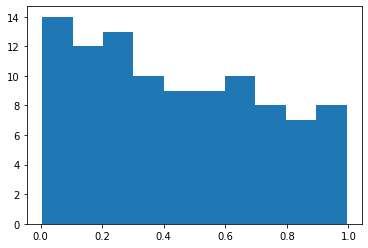

In [9]:
# 查看分布

a = np.random.rand(100)
plt.hist(a)

(array([14., 12., 13., 10.,  9.,  9., 10.,  8.,  7.,  8.]),
 array([-1.5337005 , -1.18563229, -0.83756407, -0.48949586, -0.14142764,
         0.20664057,  0.55470879,  0.902777  ,  1.25084522,  1.59891343,
         1.94698165]),
 <a list of 10 Patch objects>)

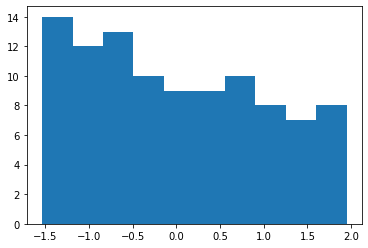

In [10]:
# 做完标准化之后查看分布

std = StandardScaler().fit(a.reshape(-1,1))
stda = std.transform(a.reshape(-1,1))
plt.hist(stda)

(array([14., 12., 13., 10.,  9.,  9., 10.,  8.,  7.,  8.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

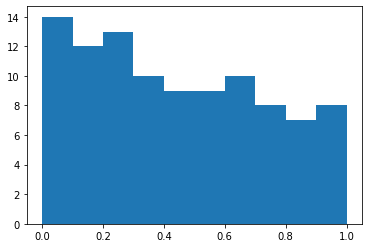

In [11]:
# 做归一化之后，分布式是否变化
mms = MinMaxScaler().fit(a.reshape(-1,1))
mmsa = mms.transform(a.reshape(-1,1))
plt.hist(mmsa)

In [12]:
# 缺失值的处理
import numpy as np
import pandas as pd
data = pd.read_csv("Narrativedata.csv")
data

,Age,Sex,Embarked,Survived
0,22.0,male,S,No
1,38.0,female,C,Yes
2,26.0,female,S,Yes
3,35.0,female,S,Yes
4,35.0,male,S,No
...,...,...,...,...
886,27.0,male,S,No
887,19.0,female,S,Yes
888,NaN,female,S,No
889,26.0,male,C,Unknown


In [13]:
#查看缺失值
#data.info()

#Tips:缺失值比例
data.isna().mean()

Age         0.198653
Sex         0.000000
Embarked    0.002245
Survived    0.000000
dtype: float64

In [14]:
# 有的列里面虽然是没有np.nan,但是很可能当前缺失值是以字符串的形式存在数据里面
# 单独将这一列拿出来，做一个value_counts的动作
data['Survived'].value_counts()

No         486
Yes        310
Unknown     95
Name: Survived, dtype: int64

In [15]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [16]:
# 加入数据集当中有多个连续特征需要进行空缺值填补，可以select_dtypes的形式，一并将这些特征全部筛选出来
# 当前筛选出来的特数据已经是一个二维数组。可以直接放入于sklearn的preprocessing包里面去
# data['Age2'] = 3

# con_features = data.select_dtypes(['float', 'int'])
# SimpleImputer(strategy = 'median').fit_transform(con_features)

In [17]:
# 使用SimpleImputer
from sklearn.impute import SimpleImputer

# 使用中位数填补Age
Age = data['Age'].values.reshape(-1, 1)      # 0329期，李勣，可以使用mat. T的方法加入SimpleImputer
imp_median = SimpleImputer(strategy = 'median').fit(Age)
data['Age'] = imp_median.transform(Age)

# 如果想用常数来填补空缺值的话，策略参数为constant,并且和fill_value一起使用，指定想填补常数
# SimpleImputer(strategy = 'constant', fill_value = 0)     #fillna(0)

# 使用众数填补Embarked
Embarked = data['Embarked'].values.reshape(-1,1)
imp_freq = SimpleImputer(strategy = 'most_frequent').fit(Embarked)
data['Embarked'] = imp_freq.transform(Embarked)

# 对Y值进行空缺值填补
Survived = data['Survived'].values.reshape(-1, 1)
imp_s = SimpleImputer(missing_values = 'Unknown', strategy = 'most_frequent').fit(Survived)
data['Survived'] = imp_s.transform(Survived)

In [18]:
# 编码与哑变量

# preprocessing.LabelEncoder：标签专用，能够将分类转换为分类数值
from sklearn.preprocessing import LabelEncoder
y = data['Survived']     # 不必要进行reshape,转换二维数组的形式
le = LabelEncoder().fit(y)
data['Survived'] = le.transform(y)

In [19]:
# 想写出一种代码，自动化的判断当前这个一列下面的离散的类别，自动生成replace可以用到的做编码的字典，从而对任意一个数据，都可以自动化的完成编码的操作
# d = data['Sex'].value_counts()
# data['Sex'].replace(pd.Series(range(len(d)), index = d.index))

In [20]:
data.head()

,Age,Sex,Embarked,Survived
0,22.0,male,S,0
1,38.0,female,C,1
2,26.0,female,S,1
3,35.0,female,S,1
4,35.0,male,S,0


In [21]:
# preprocessing.OrdinalEncoder：特征专用，能够将离散特征转换为分类数值
from sklearn.preprocessing import OrdinalEncoder

data_ = data[['Sex', 'Embarked']]
data_

oe = OrdinalEncoder().fit(data_)
sex_embarked = oe.transform(data_)

# 0301期张传鹏， 使用pd.factorize
#data_.apply(lambda col : pd.factorize(col)[0], axis = 0)

sex_embarked

array([[1., 2.],
       [0., 0.],
       [0., 2.],
       ...,
       [0., 2.],
       [1., 0.],
       [1., 1.]])

In [22]:
# 如何知道转换之后，每一个编码它代表的是原来什么值
oe.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [23]:
# preprocessing.OneHotEncoder：独热编码，创建哑变量
data_ = data[['Sex', 'Embarked']]

from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder().fit(data_)
one_hot_results = onehot.transform(data_).toarray()

In [24]:
onehot.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

In [25]:
one_hot_results

array([[0., 1., 0., 0., 1.],
       [1., 0., 1., 0., 0.],
       [1., 0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0., 1.],
       [0., 1., 1., 0., 0.],
       [0., 1., 0., 1., 0.]])

In [26]:
#np.append(*features + onehot.categories_)

In [27]:
# 尝试将features给提取出来
features = np.array(['Sex', 'Embarked'])

# 尝试在features里面每个元素的后面加上_,用于区分
features = np.array([i + '_' for i in features])

# 尝试将categories_提取出来准备做新数据的列名
one_hot_features = np.array(onehot.categories_)

# 使用feaures + one_hot_features借助numpy广播的形式来将Sex_后面加上其所有的类别，Embarked_后面加上其所有的类别
nest_features = features + one_hot_features

# 使用np.append(*nest_features)将数据集里所有的元素全部追加在一起形成干净的colnames
colnames = np.append(*nest_features)

In [28]:
# 将onehot_result做成dataframe，并且添加上这个是正确的原始的列名
one_hot_df = pd.DataFrame(one_hot_results, columns = colnames)

# 用pd.concat进行拼接
data_new = pd.concat([data, one_hot_df], axis = 1)

In [29]:
data_new.columns

Index(['Age', 'Sex', 'Embarked', 'Survived', 'Sex_female', 'Sex_male',
       'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [30]:
# 将当前的data中列名里的标签给pop出来，用lable变量接住
data_new = data_new.drop(['Sex', 'Embarked'], axis = 1)

# 使用pandas的reindex的方式来按col_name重新排序列名
data_new = data_new.reindex(['Age', 'Sex_female', 'Sex_male','Embarked_C', 'Embarked_Q', 'Embarked_S', 'Survived'], axis = 1)
data_new.head()

,Age,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Survived
0,22.0,0.0,1.0,0.0,0.0,1.0,0
1,38.0,1.0,0.0,1.0,0.0,0.0,1
2,26.0,1.0,0.0,0.0,0.0,1.0,1
3,35.0,1.0,0.0,0.0,0.0,1.0,1
4,35.0,0.0,1.0,0.0,0.0,1.0,0


In [31]:
#from sklearn.impute import KNNImputer
#from missingpy import KNNImputer, MissForest

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, train_test_split
X = data_new.iloc[:, :-1]
Y = data_new.iloc[:, -1]
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size = 0.3)
rfc = RandomForestClassifier(n_estimators = 100).fit(Xtrain, Ytrain)
#rfc.score(Xtrain, Ytrain), rfc.score(Xtest, Ytest)
cross_val_score(rfc, X, Y, cv = 10).mean()

0.7307116104868915

In [33]:
# 处理连续型特征：二值化与分段
# sklearn.preprocessing.Binarizer：根据阈值将数据二值化，特征专用

# 首先提取出当前的age这一列，一般做预处理，如果只是对一列进行转换的话，需要做reshape的动作，将一个维数据转换成竖着的形式的二维数据

from sklearn.preprocessing import Binarizer
# 实例化并且转换
Age = data['Age'].values.reshape(-1, 1)
bin_age = Binarizer(threshold = 30).fit(Age)
binary_age = bin_age.transform(Age)

In [37]:
Age

array([[22.  ],
       [38.  ],
       [26.  ],
       [35.  ],
       [35.  ],
       [28.  ],
       [54.  ],
       [ 2.  ],
       [27.  ],
       [14.  ],
       [ 4.  ],
       [58.  ],
       [20.  ],
       [39.  ],
       [14.  ],
       [55.  ],
       [ 2.  ],
       [28.  ],
       [31.  ],
       [28.  ],
       [35.  ],
       [34.  ],
       [15.  ],
       [28.  ],
       [ 8.  ],
       [38.  ],
       [28.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [40.  ],
       [28.  ],
       [28.  ],
       [66.  ],
       [28.  ],
       [42.  ],
       [28.  ],
       [21.  ],
       [18.  ],
       [14.  ],
       [40.  ],
       [27.  ],
       [28.  ],
       [ 3.  ],
       [19.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [28.  ],
       [18.  ],
       [ 7.  ],
       [21.  ],
       [49.  ],
       [29.  ],
       [65.  ],
       [28.  ],
       [21.  ],
       [28.5 ],
       [ 5.  ],
       [11.  ],
       [22.  ],
       [38.  ],
       [

In [38]:
# preprocessing.KBinsDiscretizer：将连续变量划分为离散变量
from sklearn.preprocessing import KBinsDiscretizer
kb_age = KBinsDiscretizer(n_bins = 4, encode = 'onehot', strategy = 'uniform').fit(Age)
transformed_age = kb_age.transform(Age).toarray()
transformed_age

# 0329 陈俊龄 kbins分箱，前面都是左闭右开，最后左闭右闭

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [41]:
Age[:5]

array([[22.],
       [38.],
       [26.],
       [35.],
       [35.]])

In [84]:
kb_age.bin_edges_[0]

array([ 0.42 , 20.315, 40.21 , 60.105, 80.   ])

In [79]:
# 将区间给提取出来
bin_edges = kb_age.bin_edges_[0]
# 取2位小数
bin_edges = np.around(bin_edges, 2)
bin_edges

# 准备开始写for循环两个两个的通过索引的方式来取
# 结果记录到列表中
col_name_list = []

# 使用索引的方式来取数据，因为是每一次要取i和i+1的位置，所以range里面要-1， 因为i = 4的时候，i + 1 =5 ,取不到索引5，会报错
for i in range(len(bin_edges) - 1):
    # 将当前索引i和后面一个i+1的取出来，并且通过np.array的方式将每个元素转会成str的形式
    col_names = np.array([bin_edges[i], bin_edges[i + 1]]).astype(str)
    
    # 将当前取出的列表里每个字符串都集合起来，形成一个整体字符，且两两元素之间', '隔开
    col_names = ', '.join(col_names)
    
    # 如果是前面的区间，左闭右开，左边一个[, 右边一个)
    # 如果是最后一个区间，左闭右闭，左边一个[, 右边一个]
    if i + 1 == len(bin_edges) - 1:
        col_names = 'Age_[' + col_names + ']'
    else:
        col_names = 'Age_[' + col_names + ')'
    # 将当前做好的区间字符加到list当中
    col_name_list.append(col_names)

In [82]:
col_name_list

['Age_[0.42, 20.32)',
 'Age_[20.32, 40.21)',
 'Age_[40.21, 60.1)',
 'Age_[60.1, 80.0]']

In [91]:
# 将列名加上去做成一个dataframe
Age_cate = pd.DataFrame(transformed_age, columns = col_name_list)
Age_cate.head()

,"Age_[0.42, 20.32)","Age_[20.32, 40.21)","Age_[40.21, 60.1)","Age_[60.1, 80.0]"
0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0


In [93]:
# 将原来的数据里面的Age去掉，Age_cate从左边拼上去，得到最终的数据集
data_final = pd.concat([Age_cate, data_new.drop('Age', axis = 1)], axis = 1)
cross_val_score(rfc, data_final.iloc[:, :-1], data_final.iloc[:, -1], cv = 5).mean()
#data_final

0.7620739438829954

In [ ]:
# 特征选择
import pandas as pd
import numpy as np
data = pd.read_csv('digit recognizor.csv')

X = data.iloc[:, 1:]
Y = data.iloc[:, 0]
print(data.shape)


# filter过滤法¶

# 方差过滤
from sklearn.feature_selection import VarianceThreshold
VTS = VarianceThreshold(threshold = X.var().median()).fit(X)
X_fsvar = VTS.transform(X)

X_fsvar.shape

# 将特征减少一半


# get_support

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(k = 5)
# cross_val_score(knn, X_fsvar, Y, cv = 5).mean()

In [ ]:
# 没有做方差过滤之前的交叉验证的分数
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X, Y, cv = 5).mean()

In [ ]:
# 没有做方差过滤之前的交叉验证的分数
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X_fsvar, Y, cv = 5).mean()

In [ ]:
# 因为3中随机:
# 1. 在bootstrap,进行了有放回的随机采样，想象成对数据集做行的随机提取，这样子的话就形成了n个采样集
# 2. 对于每一个采样集来说，又进行了列的随机的提取, 很可能只提取了10几个特征
# 3. 每一个完成的采样集来说，我们使用树模型拟合数据的过程当中，会通过randomsate来树随机性

In [ ]:
# 相关性过滤
# 尝试去找每一个特征和标签之间的相关，如果非常相关的话，我就保留，因为可以这个特征来对Y做预测

from sklearn.feature_selection import SelectKBest, chi2, f_classif, mutual_info_classif



# 卡方检验
X_fschi = SelectKBest(chi2, k = 300).fit_transform(X, Y)
X_fschi.shape

# 假设在这里，已知需要300个特征

# 验证模型效果，使用随机森林

rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X_fschi, Y, cv = 5).mean()

In [ ]:
# F检验
X_fsf = SelectKBest(f_classif, k = 300).fit_transform(X, Y)
rfc = RandomForestClassifier(n_estimators = 10)
cross_val_score(rfc, X_fsf, Y, cv = 5).mean()

In [ ]:
# # 互信息法
# X_fmif= SelectKBest(mutual_info_classif, k = 300).fit_transform(X, Y)
# rfc = RandomForestClassifier(n_estimators = 10)
# cross_val_score(rfc, X_fmif, Y, cv = 5).mean()

In [ ]:
# Embedded潜入法
from sklearn.feature_selection import SelectFromModel
rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)

X_embeded = SelectFromModel(rfc, threshold = 0.005).fit_transform(X, Y)
X_embeded.shape

cross_val_score(rfc, X_embeded, Y, cv = 5).mean()

In [ ]:
# 包装法

from sklearn.feature_selection import RFE
rfc = RandomForestClassifier(n_estimators = 10, random_state = 10)
selector = RFE(rfc, n_features_to_select = 340, step = 50).fit(X, Y)
X_wrapper = selector.transform(X)
# .ranking_

In [ ]:
pd.Series(selector.ranking_).value_counts().sort_index()

In [ ]:
cross_val_score(rfc, X_wrapper, Y, cv = 5).mean()

In [ ]:
# 降维方法



In [ ]:
a = np.mat([[1, 4],
            [4, 100]])
a

In [ ]:
np.linalg.eig(a)[0]

In [ ]:
np.linalg.eig(a)[1]

In [ ]:
a = np.mat([[1, 0.4],
            [0.4, 1]])
a

In [ ]:
np.linalg.eig(a)[0]

In [ ]:
np.linalg.eig(a)[1]

In [ ]:
# 我们首先拿到一个数据集，算出它的协方差矩阵
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

iris = load_iris()
X = pd.DataFrame(iris['data'])

# 首先不做标准化处理

In [ ]:
# 大致的观测一下X
X.head(3)

In [ ]:
# 尝试看一下PCA的结果, 不设置n_components, 想通过新的特征贡献比，选择应该选多少的特征出来
pca = PCA().fit(X)

# 给PCAA的特征值
pca.components_

In [ ]:
pca.explained_variance_

# 这个给出的是每一个新的特征的方差，其实就是特征值
# 上面给出的结果，每一列都一个特征向量。当前的这个结果是特征值，一个特征值对应一个特征向量
# 特征值，特征向量，成对出现

In [ ]:
# 重点是查看当前新的特征的一个方差比，pca.explained_variance_ / pca.explained_variance_.sum()
# 可以通过这个ratio来尝试决定应该选取多少个特征出来
pca.explained_variance_ratio_

# 通过数字比较出，当前从新的特征当中选择出最好的2个即可

In [ ]:
import matplotlib.pyplot as plt
plt.plot(range(1,5), pca.explained_variance_ratio_)


In [ ]:
# 当前我们确定了选择的特征的个数的时候，就可以来设置n_component
pca = PCA(n_components = 2).fit(X)

# 最后数据就出来了
X_final = pca.transform(X)


In [ ]:
# 如果做标准化的化
X_std = StandardScaler().fit_transform(X)
pca = PCA().fit(X_std)
pca.explained_variance_ratio_

In [ ]:
# 做了标准化之后，确定n_componets应该等于3
import matplotlib.pyplot as plt
plt.plot(range(1,5), pca.explained_variance_ratio_)

In [ ]:
pca = PCA(n_components = 3).fit(X_std)
X_final = pca.transform(X_std)

In [ ]:
# pca = PCA(n_components = 'mle')

In [ ]:
# PCA对手写数据集的降维
pca_line = PCA().fit(X)
plt.figure(figsize=[20,5])
plt.plot(pca_line.explained_variance_ratio_)
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [ ]:
# 从图中看出，最好的50个特征他们方差的占比，非常的大，后面的特征，方差的占比会非常的小
# n_components可以尝试选50

pca = PCA(n_components = 50).fit(X)
X_pca_50 = pca.transform(X)
cross_val_score(rfc, X_pca_50, Y, cv = 5).mean()

In [ ]:
#画累计方差贡献率曲线，找最佳降维后维度的范围


In [ ]:
#降维后维度的学习曲线，继续缩小最佳维度的范围
#======【TIME WARNING：2mins 30s】======#

score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(X)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()

In [ ]:
#导入找出的最佳维度进行降维，查看模型效果
X_dr = PCA(23).fit_transform(X)

#======【TIME WARNING:1mins 30s】======#
cross_val_score(RandomForestClassifier(n_estimators=100,random_state=0),X_dr,Y,cv=5).mean()

In [ ]:
1 - 23 / 785